In [1]:
!pip install openpyxl


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import config
import matplotlib.dates as dates
import sklearn.linear_model as linear_model
plt.rcParams.update({'font.size': 18})


In [3]:
chem2017 = pd.read_excel('Eh pH fO2 BA1A 2017 recalc 2-21.xlsx')
chem2017

/fp/homes01/u01/ec-johnmai/.conda/envs/spec/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,DEPT[M],PRESSURE,TEMP,PH,COND,O2,"""EH""","Eh, mV (corrected)",E0,"log(fO2), bars",dissoc H2O,delta H2O-H2,T moved,pH moved,Redox moved,Unnamed: 15,Unnamed: 16,SAL,SP
0,13.22,-0.535044,34.12957,7.674990,0.535000,5.264912,61.71064,249.241110,1.221380,-33.080879,-80.085478,47.004600,33.50594,9.612149,-31.99352,NaN,NaN,0.217899,-1.032044
1,13.23,-0.535044,34.21864,7.669997,0.535000,5.219978,62.04016,249.477463,1.221305,-33.061926,-80.057317,46.995391,45.00000,10.000000,-150.00000,Ellison example,NaN,0.217600,-1.023823
2,13.24,-0.535044,34.30774,7.665003,0.535000,5.175029,62.36979,249.713894,1.221229,-33.042986,-80.029163,46.986176,NaN,NaN,NaN,NaN,NaN,0.217300,-1.015571
3,13.25,-0.535009,34.39703,7.660032,0.534999,5.129851,62.69978,249.950487,1.221154,-33.023917,-80.000968,46.977051,NaN,NaN,NaN,NaN,NaN,0.217000,-1.007323
4,13.26,-0.520950,34.40801,7.673013,0.534700,5.068941,62.60991,249.849132,1.221145,-32.975755,-79.998791,47.023035,NaN,NaN,NaN,NaN,NaN,0.216800,-0.999076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38573,398.95,372.728400,43.19200,9.460000,1.221000,16.470000,-64.60000,113.451168,1.213717,-32.279093,-80.515030,48.235938,NaN,NaN,NaN,NaN,NaN,0.426000,-0.199630
38574,398.96,372.742500,43.19200,9.460000,1.221300,16.466000,-64.67007,113.381098,1.213717,-32.283558,-80.515062,48.231504,NaN,NaN,NaN,NaN,NaN,0.426100,-0.200420
38575,398.97,372.756500,43.19200,9.460000,1.221600,16.462000,-64.73992,113.311248,1.213717,-32.288010,-80.515094,48.227085,NaN,NaN,NaN,NaN,NaN,0.426200,-0.201210
38576,398.98,372.770600,43.19200,9.460000,1.221900,16.458000,-64.80999,113.241178,1.213717,-32.292475,-80.515126,48.222651,NaN,NaN,NaN,NaN,NaN,0.426300,-0.201997


In [4]:
chem2018 = pd.read_excel('Eh pH fO2 BA1A 2018 recalc 2-21.xlsx')
chem2018

/fp/homes01/u01/ec-johnmai/.conda/envs/spec/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,"depth, m",PRESSURE,"temperature, °C",pH,COND(FW),O2%,REDOX,"Eh, mV (corrected)",E0,"log(fO2), bars",dissoc H2O,Unnamed: 11,T moved,pH moved,Redox moved,Unnamed: 15
0,8.996,NaN,NaN,6.795000,NaN,NaN,196.4923,419.722300,NaN,NaN,NaN,NaN,33.50594,9.612149,-31.99352,NaN
1,9.046,2.900659,NaN,6.795170,NaN,56.68019,196.5919,419.821900,NaN,NaN,NaN,NaN,45.00000,10.000000,-150.00000,Ellison example
2,9.096,2.938823,33.50554,6.799098,4.182398,56.68979,196.3673,384.550505,1.221908,-27.853380,-80.554789,52.701409,NaN,NaN,NaN,NaN
3,9.146,2.946671,33.49601,6.805885,4.395324,56.71819,196.3788,384.571974,1.221916,-27.827062,-80.558342,52.731280,NaN,NaN,NaN,NaN
4,9.196,2.871685,33.48883,6.815248,4.498888,56.71642,196.2838,384.484484,1.221922,-27.797050,-80.555577,52.758527,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7801,399.046,372.868400,43.31741,9.719706,1543.927000,51.41783,-772.1416,-594.221611,1.213611,-76.287301,-80.477941,4.190640,NaN,NaN,NaN,NaN
7802,399.096,372.936000,43.31834,9.719460,1543.791000,51.39703,-772.0930,-594.173984,1.213610,-76.284862,-80.477817,4.192954,NaN,NaN,NaN,NaN
7803,399.146,373.071800,43.32051,9.721888,1544.074000,51.40906,-772.2899,-594.373153,1.213608,-76.286931,-80.477478,4.190546,NaN,NaN,NaN,NaN
7804,399.196,373.064400,43.32323,9.721834,1544.073000,51.42374,-772.1879,-594.273999,1.213606,-76.279695,-80.476650,4.196955,NaN,NaN,NaN,NaN


<Axes: xlabel='depth, m'>

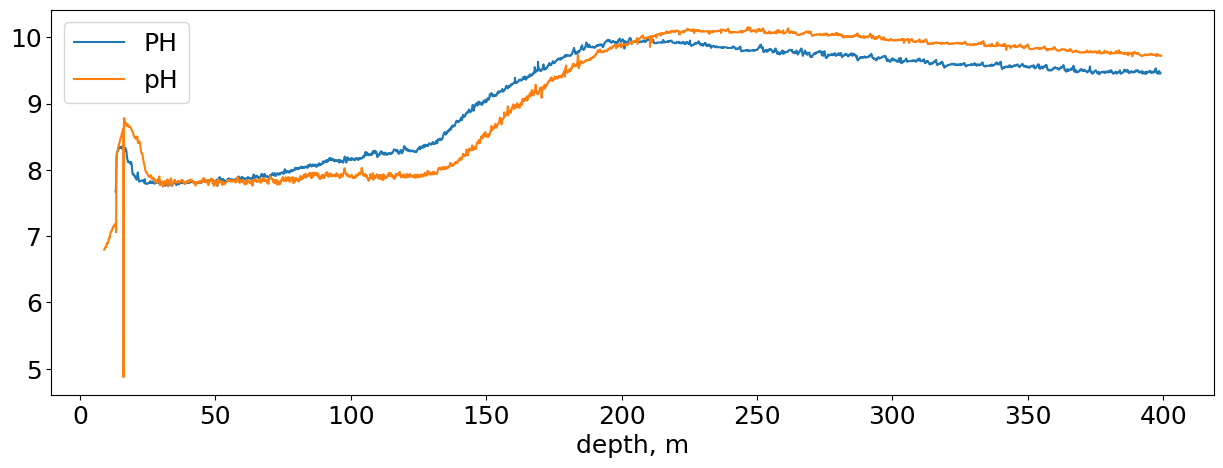

In [5]:
fig, ax = plt.subplots(figsize=(15, 5))

chem2017.plot('DEPT[M]', 'PH', ax=ax)
chem2018.plot('depth, m', 'pH', ax=ax)

<Axes: xlabel='depth, m'>

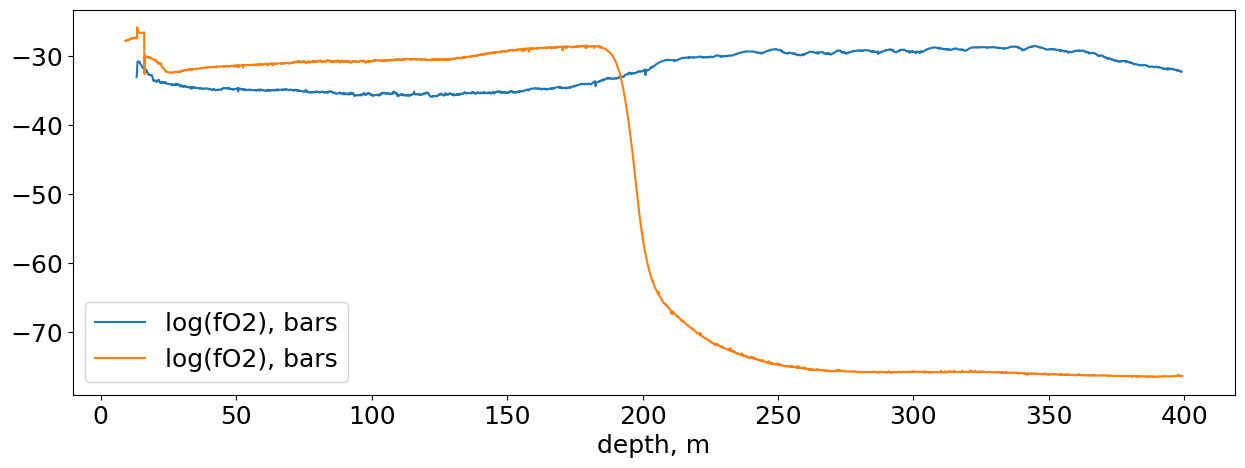

In [6]:
fig, ax = plt.subplots(figsize=(15, 5))

chem2017.plot('DEPT[M]', 'log(fO2), bars', ax=ax)
chem2018.plot('depth, m', 'log(fO2), bars', ax=ax)

In [7]:
chem2017['DEPT[M]'].diff()

0         NaN
1        0.01
2        0.01
3        0.01
4        0.01
         ... 
38573    0.01
38574    0.01
38575    0.01
38576    0.01
38577    0.01
Name: DEPT[M], Length: 38578, dtype: float64

In [8]:

def import_catalog(file):
    df = pd.read_csv(file)
    df.sort_values(by='first_arrival', inplace=True)
    df['arrival_datetime'] = df.arrival_time.apply(dates.num2date)
    return df
    
# also need to remove a number of columns that are simply irrelevant to the analysis or untested for a shareable dataset.

df141 = import_catalog(file='141precision.csv')
df188 = import_catalog(file='188precision.csv')
df197 = import_catalog(file='197precision.csv')
df211 = import_catalog(file='211precision.csv')


columns_to_keep = ['id', 'depth', 'relative_depth',
        'first_hydrophone', 'second_hydrophone',
       'arrival_time', 'first_arrival', 'second_arrival', 'dt',
       'max_amp', 'cum_amp', 'arrival_datetime', 'origin_time']

df141 = df141[columns_to_keep].copy()
df188 = df188[columns_to_keep].copy()
df197 = df197[columns_to_keep].copy()
df211 = df211[columns_to_keep].copy()

df141.sort_values(by='arrival_datetime', inplace=True)
df188.sort_values(by='arrival_datetime', inplace=True)
df197.sort_values(by='arrival_datetime', inplace=True)
df211.sort_values(by='arrival_datetime', inplace=True)

# # removing the events with maximum amplitude <0.1 since they are false positives
# df141 = df141[df141.max_amp > 0.4].copy()
# df188 = df188[df188.max_amp > 0.4].copy()
# df197 = df197[df197.max_amp > 0.4].copy()
# df211 = df211[df211.max_amp > 0.4].copy()

df141 = df141[df141.max_amp > 0.1].copy()
df188 = df188[df188.max_amp > 0.1].copy()
df197 = df197[df197.max_amp > 0.1].copy()
df211 = df211[df211.max_amp > 0.1].copy()

df141 = df141[df141.dt > -0.04].copy()
df188 = df188[df188.dt > -0.04].copy()
df197 = df197[df197.dt > -0.04].copy()
df211 = df211[df211.dt > -0.04].copy()

df141.drop_duplicates(subset=['arrival_datetime',], inplace=True)
df188.drop_duplicates(subset=['arrival_datetime',], inplace=True)
df197.drop_duplicates(subset=['arrival_datetime',], inplace=True)
df211.drop_duplicates(subset=['arrival_datetime',], inplace=True)

df141 = df141[df141.depth > 160].copy()
df188 = df188[df188.depth > 160].copy()
df197 = df197[df197.depth > 160].copy()
df211 = df211[df211.depth > 160].copy()

In [9]:
df141.max_amp.describe()

count    1550.000000
mean        1.325592
std         1.108470
min         0.101236
25%         0.658163
50%         1.024610
75%         1.636653
max        11.520440
Name: max_amp, dtype: float64

In [10]:
df141[df141.max_amp>100]

,id,depth,relative_depth,first_hydrophone,second_hydrophone,arrival_time,first_arrival,second_arrival,dt,max_amp,cum_amp,arrival_datetime,origin_time


In [11]:
df188.max_amp.describe()

count    1152.000000
mean        0.983552
std         0.869017
min         0.101966
25%         0.392429
50%         0.717305
75%         1.259656
max         7.598072
Name: max_amp, dtype: float64

In [12]:
df197.max_amp.describe()

count    373.000000
mean       0.750732
std        0.689183
min        0.105208
25%        0.391159
50%        0.549168
75%        0.890996
max        8.773850
Name: max_amp, dtype: float64

In [13]:
df211.max_amp.describe()

count    228.000000
mean       3.231750
std        2.845802
min        0.128852
25%        1.345585
50%        2.416611
75%        4.490273
max       14.438993
Name: max_amp, dtype: float64

In [14]:
df211[df211.max_amp>100]

,id,depth,relative_depth,first_hydrophone,second_hydrophone,arrival_time,first_arrival,second_arrival,dt,max_amp,cum_amp,arrival_datetime,origin_time


In [15]:
def plot_events(data, ax):
    x = data['arrival_datetime'].diff().apply(lambda t: t.total_seconds()).fillna(0).cumsum().values
    y = data['depth'].values
    s = data['max_amp'].values
    print('amplitude:',s.max())
    print(x.max())
    # ax.scatter(x/x.max(), y, s=s*10, alpha=0.3, c=plt.cm.twilight(0.4))
    # ax.scatter(x, y, s=s*10, alpha=0.3, c=plt.cm.twilight(0.4))
    ax.scatter(x, y, s=s*10, alpha=0.3, c='purple')
    return x.max()


def plot_hydrophone_depth_horizontal_line(hid, ax):
    hids = ['h1', 'h2', 'h3', 'h4', 'h5', 'h6']
    for hid in hids:
        depth = config.hydrophone_metadata_141[hid]['depth']
        ax.hlines(y=depth, xmin=-70000, xmax=700000, linestyle='--', color='black', alpha=0.25, zorder=0)

df = pd.read_excel('Dataset_BA1A.xlsx')

geology_columns = ['Re-logged in Southampton, October 2020_Dunite',
       'Re-logged in Southampton, October 2020_Dunite with Harzburgite',
       'Re-logged in Southampton, October 2020_Dunite with serpentine',
       'Re-logged in Southampton, October 2020_Dunite with some Harzburgite',
       'Re-logged in Southampton, October 2020_Dunite with some serpentine',
       'Re-logged in Southampton, October 2020_Gabbro with harzburgite',
       'Re-logged in Southampton, October 2020_Harzburgite',
       'Re-logged in Southampton, October 2020_Harzburgite with gabbro',
       'Re-logged in Southampton, October 2020_Harzburgite with some dunite and gabbro',
       'Re-logged in Southampton, October 2020_Harzburgite with some gabbro',
       'Re-logged in Southampton, October 2020_Harzburgite with some serpentine',
       'Re-logged in Southampton, October 2020_Harzburgite with some serpentine and gabbro',
       'TOP_DEPTH']
geo_df = df[geology_columns].copy()

plot_data = geo_df.set_index('TOP_DEPTH').transpose()
for n, idx in enumerate(plot_data.index):
    plot_data.loc[idx] = plot_data.loc[idx] * (n + 1)
plot_data.loc['combined'] = plot_data.sum()
plot_data = plot_data.transpose()
plot_data = plot_data['combined'].replace(0, np.nan).ffill().bfill()

x = np.array([0, 1])
y = np.vstack(plot_data.index)
xx, yy = np.meshgrid(x, y)
Z = np.vstack(plot_data.values)

amplitude: 11.520440125954403
3577.990999999998
amplitude: 7.598071922037461
4632.993999000002
amplitude: 8.773849871513404
6325.019998999998
amplitude: 14.438993157294162
1232.3829999999994


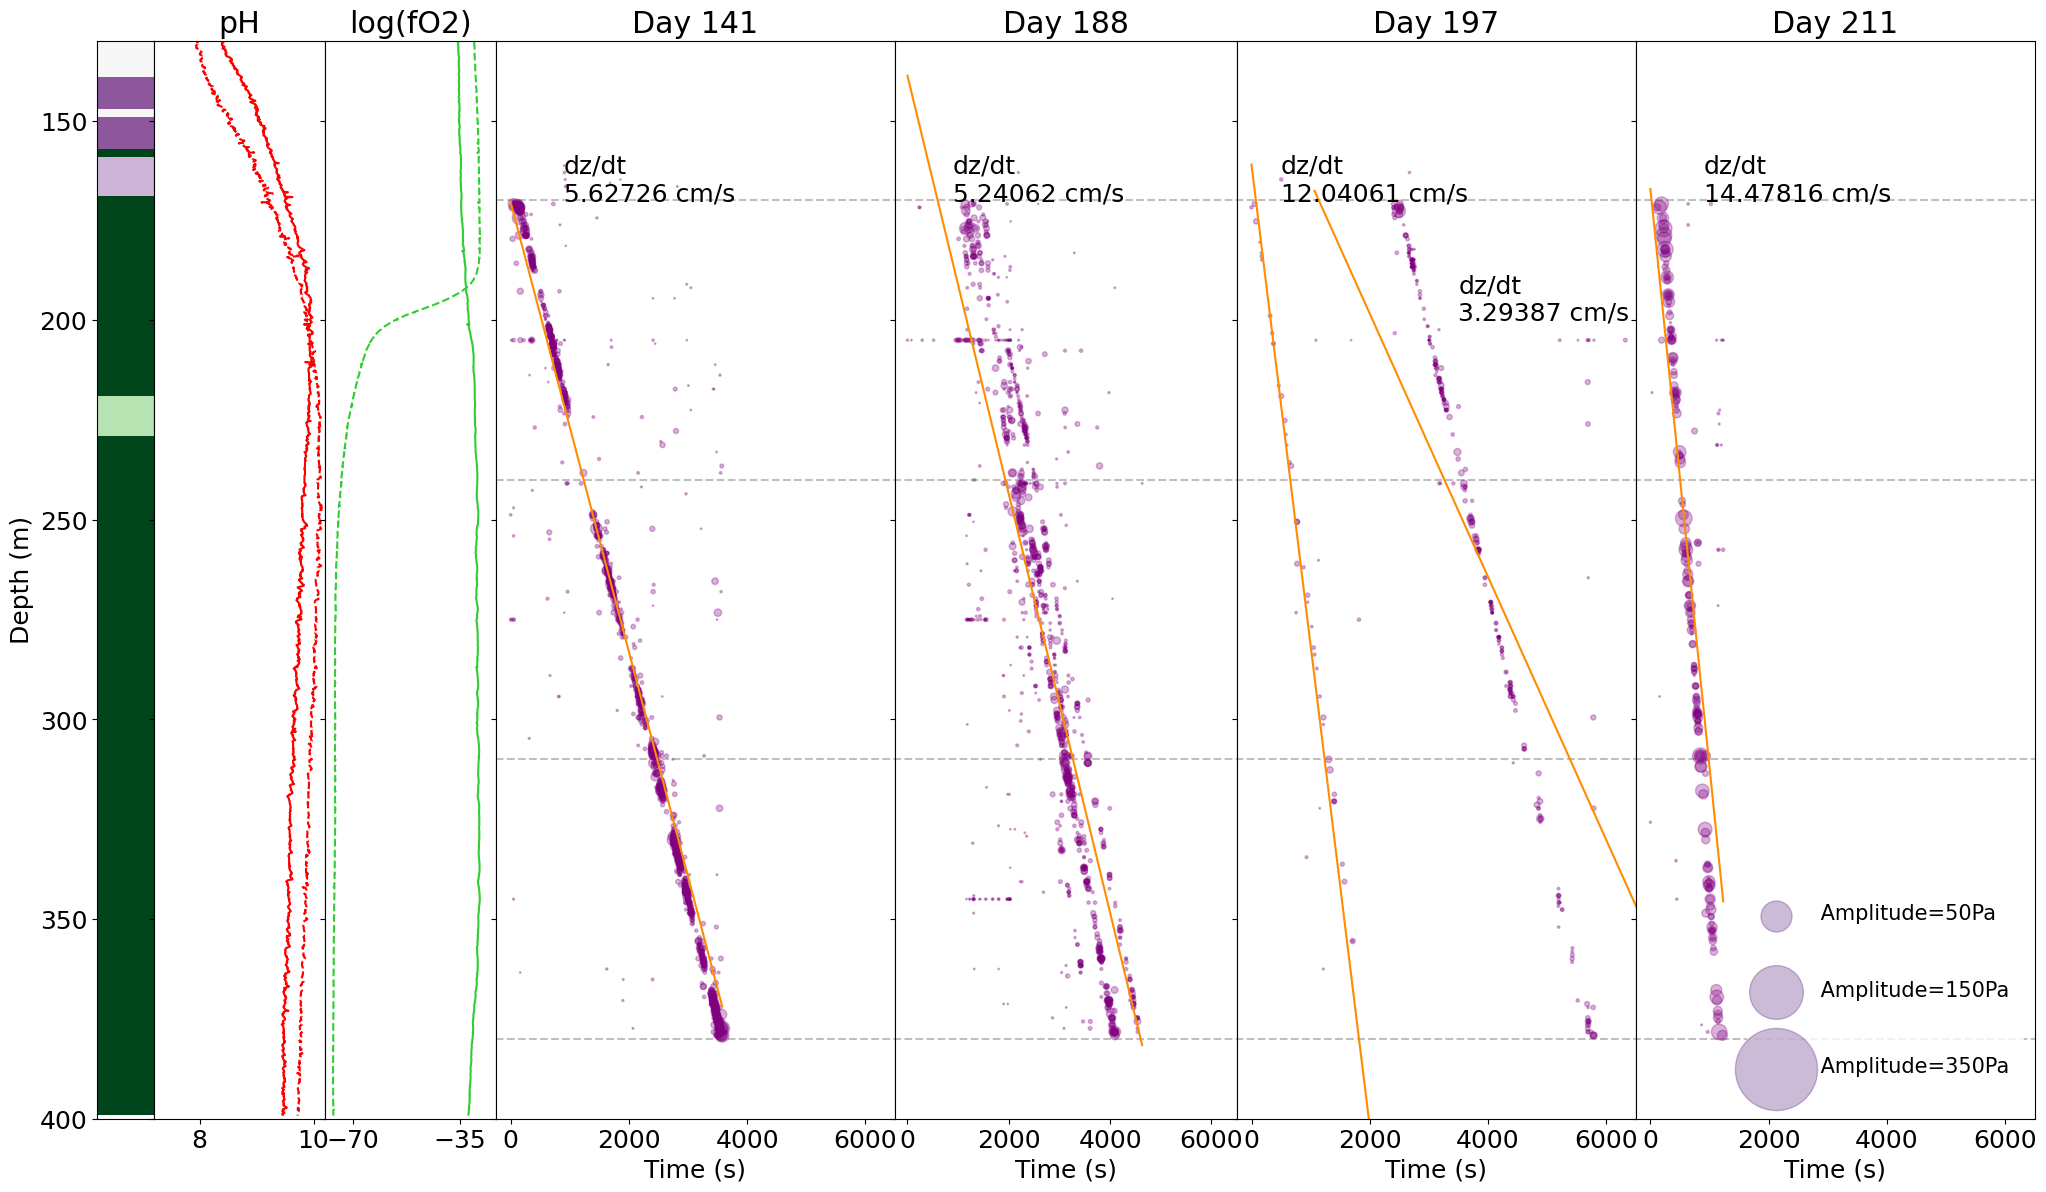

In [16]:
fig = plt.figure(figsize=(25, 14))
mosaic = fig.subplot_mosaic('''
                            apppooobbbbbbbccccccdddddddeeeeeee
                            apppooobbbbbbbccccccdddddddeeeeeee
                            apppooobbbbbbbccccccdddddddeeeeeee
                            apppooobbbbbbbccccccdddddddeeeeeee
                            '''
                           ,sharey=True)
fig.subplots_adjust(wspace=0)

mosaic['p'].plot(chem2017.PH.values, chem2017['DEPT[M]'].values, color='red')
mosaic['p'].plot(chem2018.pH.values, chem2018['depth, m'].values, color='red', linestyle='--')
mosaic['p'].set_title('pH')
mosaic['p'].set_xlim(7.2, 10.2)

# chem2017.plot('PH', 'DEPT[M]', ax=mosaic['p'])
# chem2018.plot('pH', 'depth, m', ax=mosaic['p'])

mosaic['o'].plot(chem2017['log(fO2), bars'].values, chem2017['DEPT[M]'].values, color='limegreen')
mosaic['o'].plot(chem2018['log(fO2), bars'].values, chem2018['depth, m'].values, color='limegreen', linestyle='--')
mosaic['o'].set_title('log(fO2)')
mosaic['o'].set_xticks([-70, -35])

# chem2017.plot('log(fO2), bars', 'DEPT[M]', ax=mosaic['o'])
# chem2018.plot('log(fO2), bars', 'depth, m', ax=mosaic['o'])

mosaic['a'].set_ylim(400, 130)
mosaic['a'].set_xticks([])
mosaic['a'].set_ylabel('Depth (m)')

for ax in 'bcde':
    mosaic[ax].set_xlim(-250, 6500)
    mosaic[ax].set_xlabel('Time (s)')

mosaic['e'].scatter(() , (), s=[50*10,], alpha=0.3, color=plt.cm.twilight(0.4), label='\n Amplitude=50Pa \n')
mosaic['e'].scatter(() , (), s=[150*10,], alpha=0.3, color=plt.cm.twilight(0.4), label='\n Amplitude=150Pa \n')
mosaic['e'].scatter(() , (), s=[350*10,], alpha=0.3, color=plt.cm.twilight(0.4), label='\n Amplitude=350Pa \n')
# mosaic['e'].scatter(() , (), s=[550*10,], alpha=0.3, color=plt.cm.twilight(0.4), label='\n Amplitude=550Pa \n')
mosaic['e'].legend(edgecolor='None', loc='lower right', fontsize=15)

plot_hydrophone_depth_horizontal_line(hid='h3', ax=mosaic['b'])
plot_hydrophone_depth_horizontal_line(hid='h4', ax=mosaic['c'])
plot_hydrophone_depth_horizontal_line(hid='h5', ax=mosaic['d'])
plot_hydrophone_depth_horizontal_line(hid='h6', ax=mosaic['e'])

mosaic['b'].set_title('Day 141')
mosaic['c'].set_title('Day 188')
mosaic['d'].set_title('Day 197')
mosaic['e'].set_title('Day 211')

##############
# PLOT DATA HERE
#############

mosaic['a'].pcolormesh(xx, yy, Z[:-1], vmin=0, vmax=6, cmap='PRGn', shading='auto')

x141 = plot_events(data=df141, ax=mosaic['b'])
x188 = plot_events(data=df188, ax=mosaic['c'])
x197 = plot_events(data=df197, ax=mosaic['d'])
x211 = plot_events(data=df211, ax=mosaic['e'])

def fitline(data, ax):
    x = data['arrival_datetime'].diff().apply(lambda t: t.total_seconds()).fillna(0).cumsum().values.reshape(-1, 1)
    y = data['depth'].values.reshape(-1, 1)
    lr = linear_model.LinearRegression()
    lr.fit(x, y)
    modx = np.linspace(0, x.max(), 1000)
    mody = lr.intercept_[0] + lr.coef_[0] * modx
    
    ax.plot(modx, mody, color='darkorange')
    ax.text(s=f'dz/dt\n{np.round(lr.coef_[0][0]*100, 5)} cm/s'
            , x=900, y=170
           ,fontsize=18)

fitline(df141, ax=mosaic['b'])
fitline(df188, ax=mosaic['c'])
fitline(df211, ax=mosaic['e'])

# 197 fitline 1
data = df197[:30].copy()
x = data['arrival_datetime'].diff().apply(lambda t: t.total_seconds()).fillna(0).cumsum().values.reshape(-1, 1)
y = data['depth'].values.reshape(-1, 1)
lr = linear_model.LinearRegression()
lr.fit(x, y)
xmod = np.linspace(0, 2500, 1000)
ymod = lr.intercept_ + lr.coef_[0] * xmod
mosaic['d'].plot(xmod, ymod, color='darkorange')
mosaic['d'].text(s=f'dz/dt\n{np.round(lr.coef_[0][0]*100, 5)} cm/s'
                 ,x=500, y=170
                 ,fontsize=18)
xstop = x.max()

# 197 fitline 2
data = df197[31:].copy()
x = data['arrival_datetime'].diff().apply(lambda t: t.total_seconds()).fillna(0).cumsum().values.reshape(-1, 1)
y = data['depth'].values.reshape(-1, 1)
lr = linear_model.LinearRegression()
lr.fit(x, y)
xmod = np.linspace(xstop, 7000, 1000)
ymod = lr.intercept_ + lr.coef_[0] * (xmod - xstop)
mosaic['d'].plot(xmod, ymod, color='darkorange')
mosaic['d'].text(s=f'dz/dt\n{np.round(lr.coef_[0][0]*100, 5)} cm/s'
                 ,x=3500, y=200
                 ,fontsize=18)

fig.savefig('fig4.pdf', bbox_inches='tight')

In [17]:
df141

,id,depth,relative_depth,first_hydrophone,second_hydrophone,arrival_time,first_arrival,second_arrival,dt,max_amp,cum_amp,arrival_datetime,origin_time
1,1,248.750,8.750,3,4,18037.318187,2019-05-21 07:38:11.373000+00:00,2019-05-21 07:38:11.403000+00:00,-0.030,0.316728,36.815440,2019-05-21 07:38:11.373000+00:00,2019-05-21T07:38:11.368000Z
5,5,275.000,35.000,3,4,18037.318229,2019-05-21 07:38:15.004000+00:00,2019-05-21 07:38:15.004000+00:00,0.000,0.236501,29.289808,2019-05-21 07:38:15.004000+00:00,2019-05-21T07:38:14.984000Z
8,8,275.000,35.000,3,4,18037.318261,2019-05-21 07:38:17.764000+00:00,2019-05-21 07:38:17.764000+00:00,0.000,0.518159,26.864022,2019-05-21 07:38:17.764000+00:00,2019-05-21T07:38:17.744000Z
11,11,205.000,35.000,2,3,18037.318377,2019-05-21 07:38:27.763000+00:00,2019-05-21 07:38:27.763000+00:00,0.000,0.289870,63.641306,2019-05-21 07:38:27.763000+00:00,2019-05-21T07:38:27.743000Z
14,14,171.750,1.750,2,3,18037.318552,2019-05-21 07:38:42.923000+00:00,2019-05-21 07:38:42.961000+00:00,-0.038,2.794486,122.480695,2019-05-21 07:38:42.923000+00:00,2019-05-21T07:38:42.922000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2230,2230,377.375,67.375,5,4,18037.359525,2019-05-21 08:37:42.974000+00:00,2019-05-21 08:37:43.011000+00:00,-0.037,6.796196,278.885829,2019-05-21 08:37:42.974000+00:00,2019-05-21T08:37:42.935500Z
2231,2231,236.500,66.500,4,2,18037.359528,2019-05-21 08:37:43.220000+00:00,2019-05-21 08:37:43.238000+00:00,-0.018,0.778774,59.396377,2019-05-21 08:37:43.220000+00:00,2019-05-21T08:37:43.182000Z
2237,2237,377.375,67.375,5,4,18037.359570,2019-05-21 08:37:46.890000+00:00,2019-05-21 08:37:46.927000+00:00,-0.037,8.483549,240.045598,2019-05-21 08:37:46.890000+00:00,2019-05-21T08:37:46.851500Z
2239,2239,379.125,69.125,5,4,18037.359589,2019-05-21 08:37:48.512000+00:00,2019-05-21 08:37:48.551000+00:00,-0.039,9.680418,285.003531,2019-05-21 08:37:48.512000+00:00,2019-05-21T08:37:48.472500Z


amplitude: 11.520440125954403
3577.990999999998
amplitude: 7.598071922037461
4632.993999000002
amplitude: 8.773849871513404
6325.019998999998
amplitude: 14.19216906529866
890.5410009999999


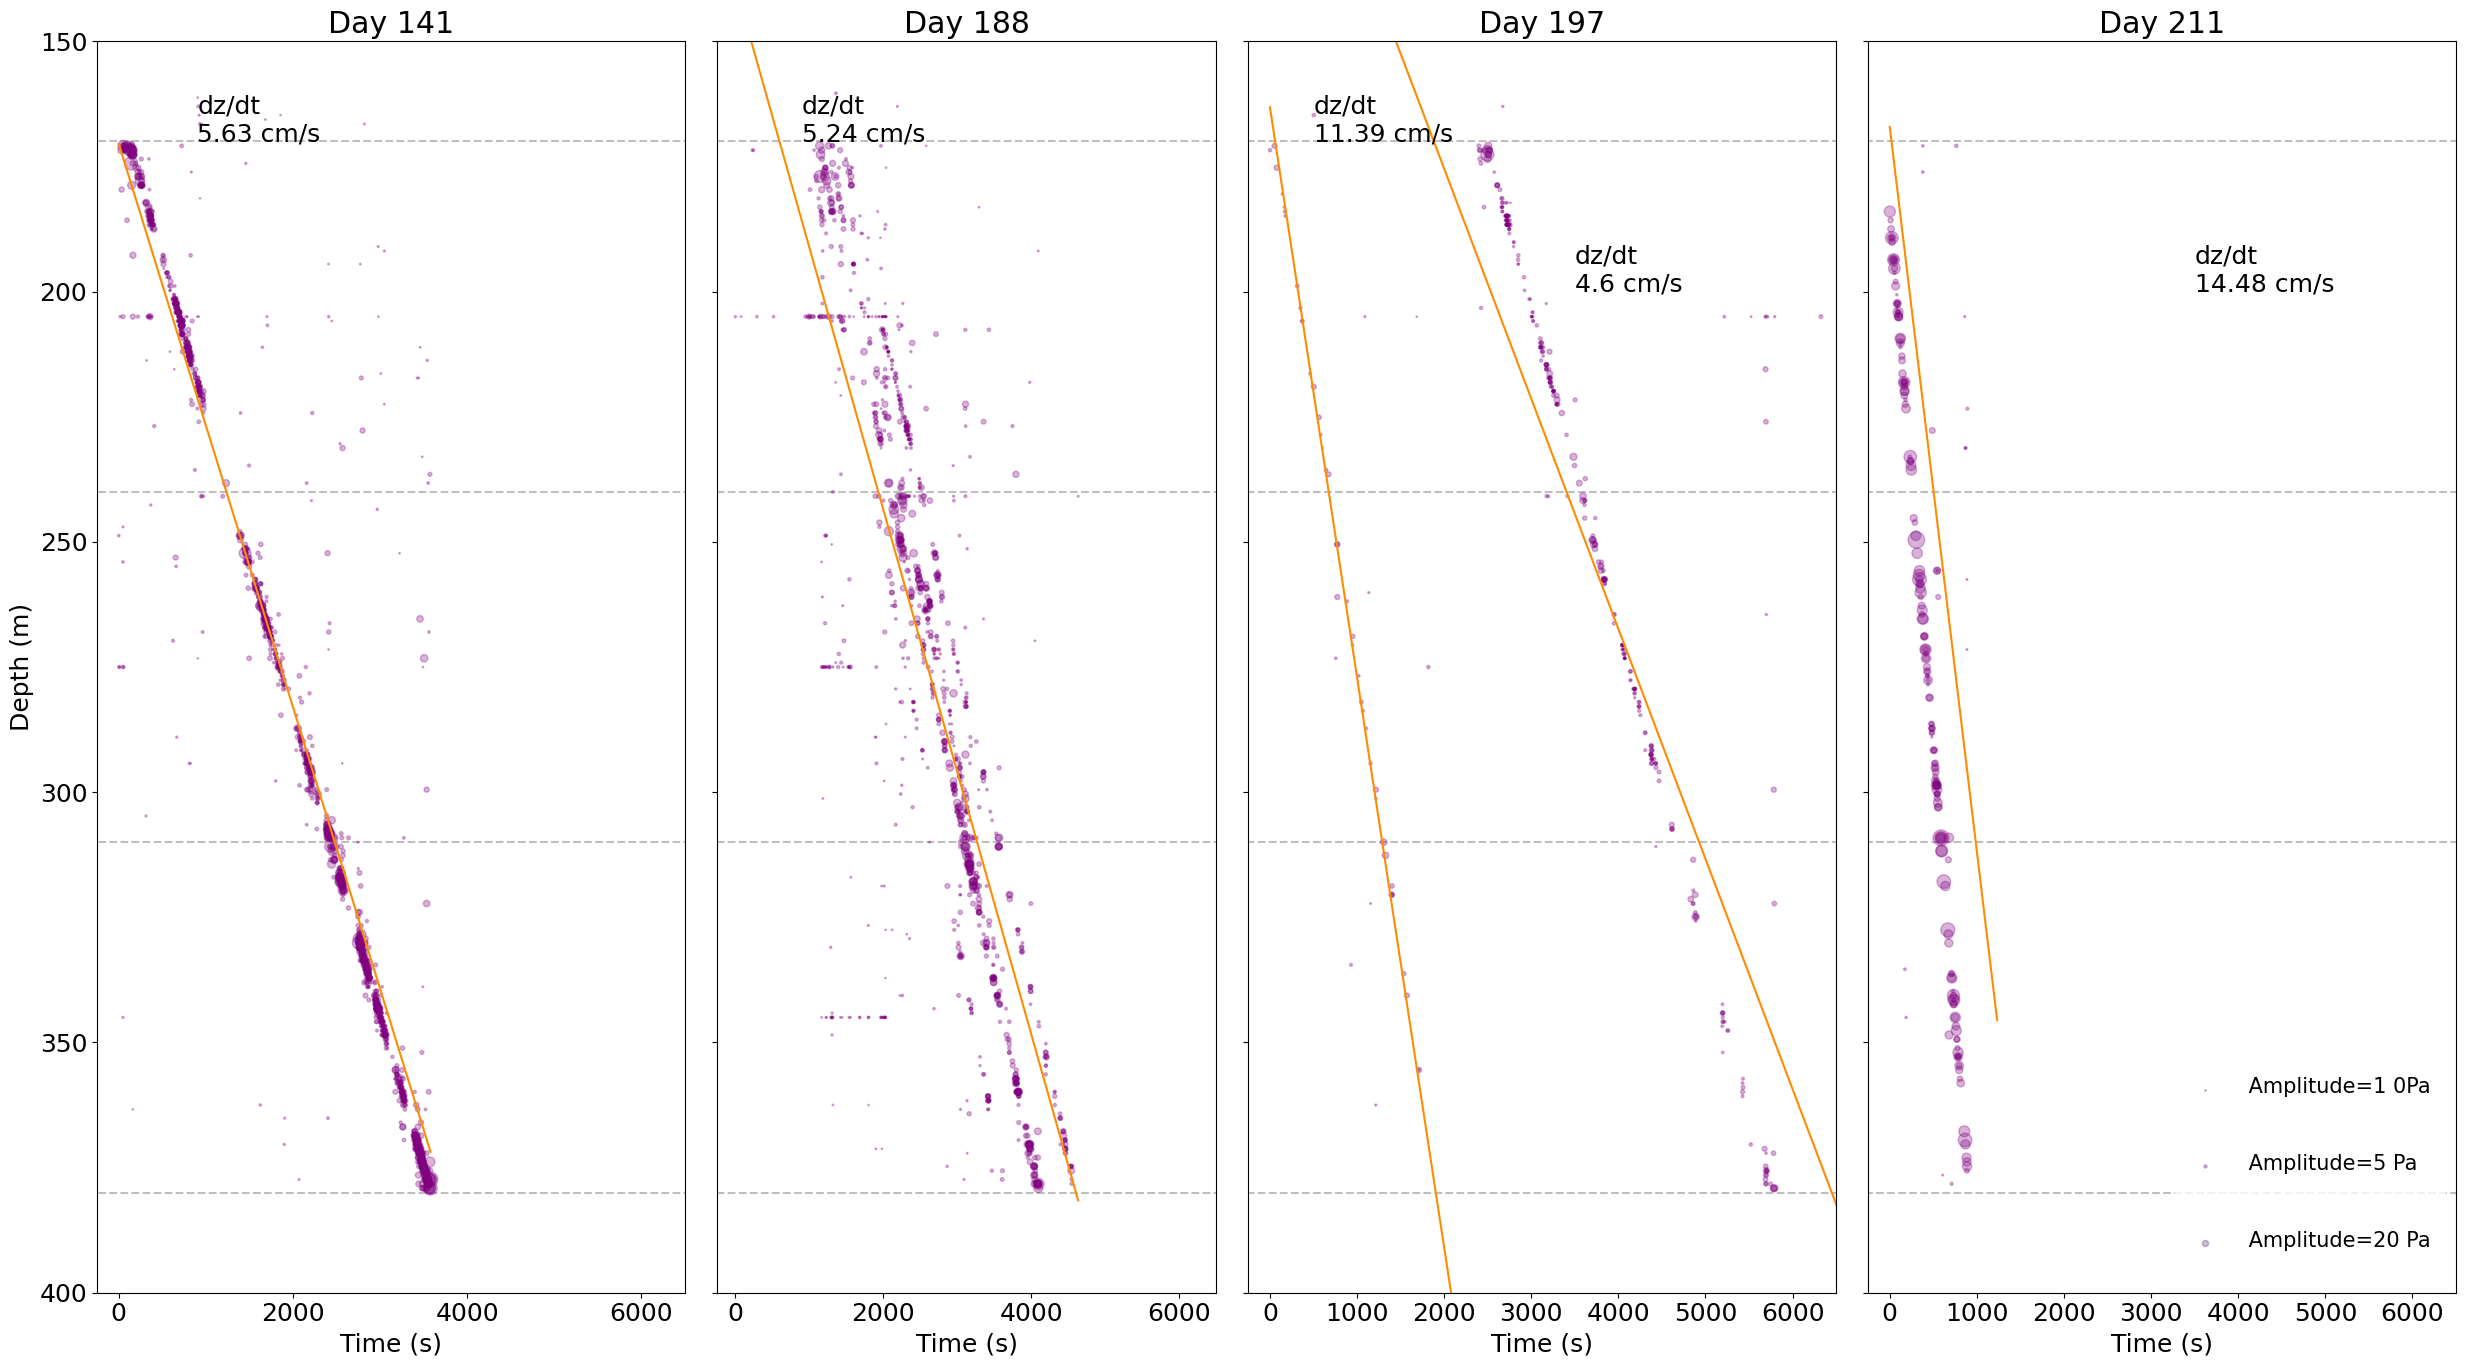

In [34]:
# fig = plt.figure(figsize=(25, 14))
# mosaic = fig.subplot_mosaic('''
#                             bbbbbbbccccccdddddddeeeeeee
#                             bbbbbbbccccccdddddddeeeeeee
#                             bbbbbbbccccccdddddddeeeeeee
#                             bbbbbbbccccccdddddddeeeeeee
#                             '''
#                            ,sharey=True)
# fig.subplots_adjust(wspace=0)

# mosaic['b'].set_ylim(400, 150)
# mosaic['b'].set_xticks([])
# mosaic['b'].set_ylabel('Depth (m)')

# for ax in 'bcde':
#     mosaic[ax].set_xlim(-250, 6500)
#     mosaic[ax].set_xlabel('Time (s)')

# mosaic['e'].scatter(() , (), s=[1*10,], alpha=0.3, color=plt.cm.twilight(0.4), label='\n Amplitude=1 0Pa \n')
# mosaic['e'].scatter(() , (), s=[5*10,], alpha=0.3, color=plt.cm.twilight(0.4), label='\n Amplitude=5 Pa \n')
# mosaic['e'].scatter(() , (), s=[20*10,], alpha=0.3, color=plt.cm.twilight(0.4), label='\n Amplitude=20 Pa \n')
# # mosaic['e'].scatter(() , (), s=[550*10,], alpha=0.3, color=plt.cm.twilight(0.4), label='\n Amplitude=550Pa \n')
# mosaic['e'].legend(edgecolor='None', loc='lower right', fontsize=15)

# plot_hydrophone_depth_horizontal_line(hid='h3', ax=mosaic['b'])
# plot_hydrophone_depth_horizontal_line(hid='h4', ax=mosaic['c'])
# plot_hydrophone_depth_horizontal_line(hid='h5', ax=mosaic['d'])
# plot_hydrophone_depth_horizontal_line(hid='h6', ax=mosaic['e'])

# mosaic['b'].set_title('Day 141')
# mosaic['c'].set_title('Day 188')
# mosaic['d'].set_title('Day 197')
# mosaic['e'].set_title('Day 211')

# ##############
# # PLOT DATA HERE
# #############

# # mosaic['a'].pcolormesh(xx, yy, Z[:-1], vmin=0, vmax=6, cmap='PRGn', shading='auto')

# x141 = plot_events(data=df141, ax=mosaic['b'])
# x188 = plot_events(data=df188, ax=mosaic['c'])
# x197 = plot_events(data=df197, ax=mosaic['d'])
# x211 = plot_events(data=df211[20:-10], ax=mosaic['e'])

# def fitline(data, ax):
#     # x = data['arrival_datetime'].diff().apply(lambda t: t.total_seconds()).fillna(0).cumsum().values.reshape(-1, 1)
#     # x = data['arrival_datetime'].diff().apply(lambda t: t.total_seconds()).fillna(0).cumsum().values.reshape(-1, 1)
#     x = pd.to_datetime(data['origin_time']).diff().apply(lambda t: t.total_seconds()).fillna(0).cumsum().values.reshape(-1, 1)
#     y = data['depth'].values.reshape(-1, 1)
#     lr = linear_model.LinearRegression()
#     lr.fit(x, y)
#     modx = np.linspace(0, x.max(), 1000)
#     mody = lr.intercept_[0] + lr.coef_[0] * modx
    
#     ax.plot(modx, mody, color='darkorange')
#     ax.text(s=f'dz/dt\n{np.round(lr.coef_[0][0]*100, 2)} cm/s'
#             , x=900, y=170
#            ,fontsize=18)

# fitline(df141, ax=mosaic['b'])
# fitline(df188, ax=mosaic['c'])
# # fitline(df211, ax=mosaic['e'])

# # 197 fitline 1
# data = df197[:44].copy()
# x = data['arrival_datetime'].diff().apply(lambda t: t.total_seconds()).fillna(0).cumsum().values.reshape(-1, 1)
# y = data['depth'].values.reshape(-1, 1)
# lr = linear_model.LinearRegression()
# lr.fit(x, y)
# xmod = np.linspace(0, 2500, 1000)
# ymod = lr.intercept_ + lr.coef_[0] * xmod
# mosaic['d'].plot(xmod, ymod, color='darkorange')
# mosaic['d'].text(s=f'dz/dt\n{np.round(lr.coef_[0][0]*100, 2)} cm/s'
#                  ,x=500, y=170
#                  ,fontsize=18)
# xstop = x.max()

# # 197 fitline 2
# data = df197[44:].copy()
# x = data['arrival_datetime'].diff().apply(lambda t: t.total_seconds()).fillna(0).cumsum().values.reshape(-1, 1)
# y = data['depth'].values.reshape(-1, 1)
# lr = linear_model.LinearRegression()
# lr.fit(x, y)
# xmod = np.linspace(xstop, 7000, 1000)
# ymod = lr.intercept_ + lr.coef_[0] * (xmod - xstop)
# mosaic['d'].plot(xmod, ymod, color='darkorange')
# mosaic['d'].text(s=f'dz/dt\n{np.round(lr.coef_[0][0]*100, 2)} cm/s'
#                  ,x=3500, y=200
#                  ,fontsize=18)

# # 211 fitline
# data = df211[20:].copy()
# x = data['arrival_datetime'].diff().apply(lambda t: t.total_seconds()).fillna(0).cumsum().values.reshape(-1, 1)
# y = data['depth'].values.reshape(-1, 1)
# lr = linear_model.LinearRegression()
# lr.fit(x, y)
# xmod = np.linspace(0, x.max(), 1000)
# ymod = lr.intercept_ + lr.coef_[0] * (xmod)
# mosaic['e'].plot(xmod, ymod, color='darkorange')
# mosaic['e'].text(s=f'dz/dt\n{np.round(lr.coef_[0][0]*100, 2)} cm/s'
#                  ,x=3500, y=200
#                  ,fontsize=18)

# mosaic['b'].set_xticks(np.arange(0, 6001, 2000))
# # mosaic['b'].set_xlim(-50, 4500)

# fig.tight_layout()
# fig.savefig('fig4.pdf', bbox_inches='tight')

amplitude: 11.520440125954403
3577.9574999999954
amplitude: 7.598071922037461
4633.0134999999955
amplitude: 8.773849871513404
6325.0009979999995
amplitude: 14.19216906529866
890.5184999999996


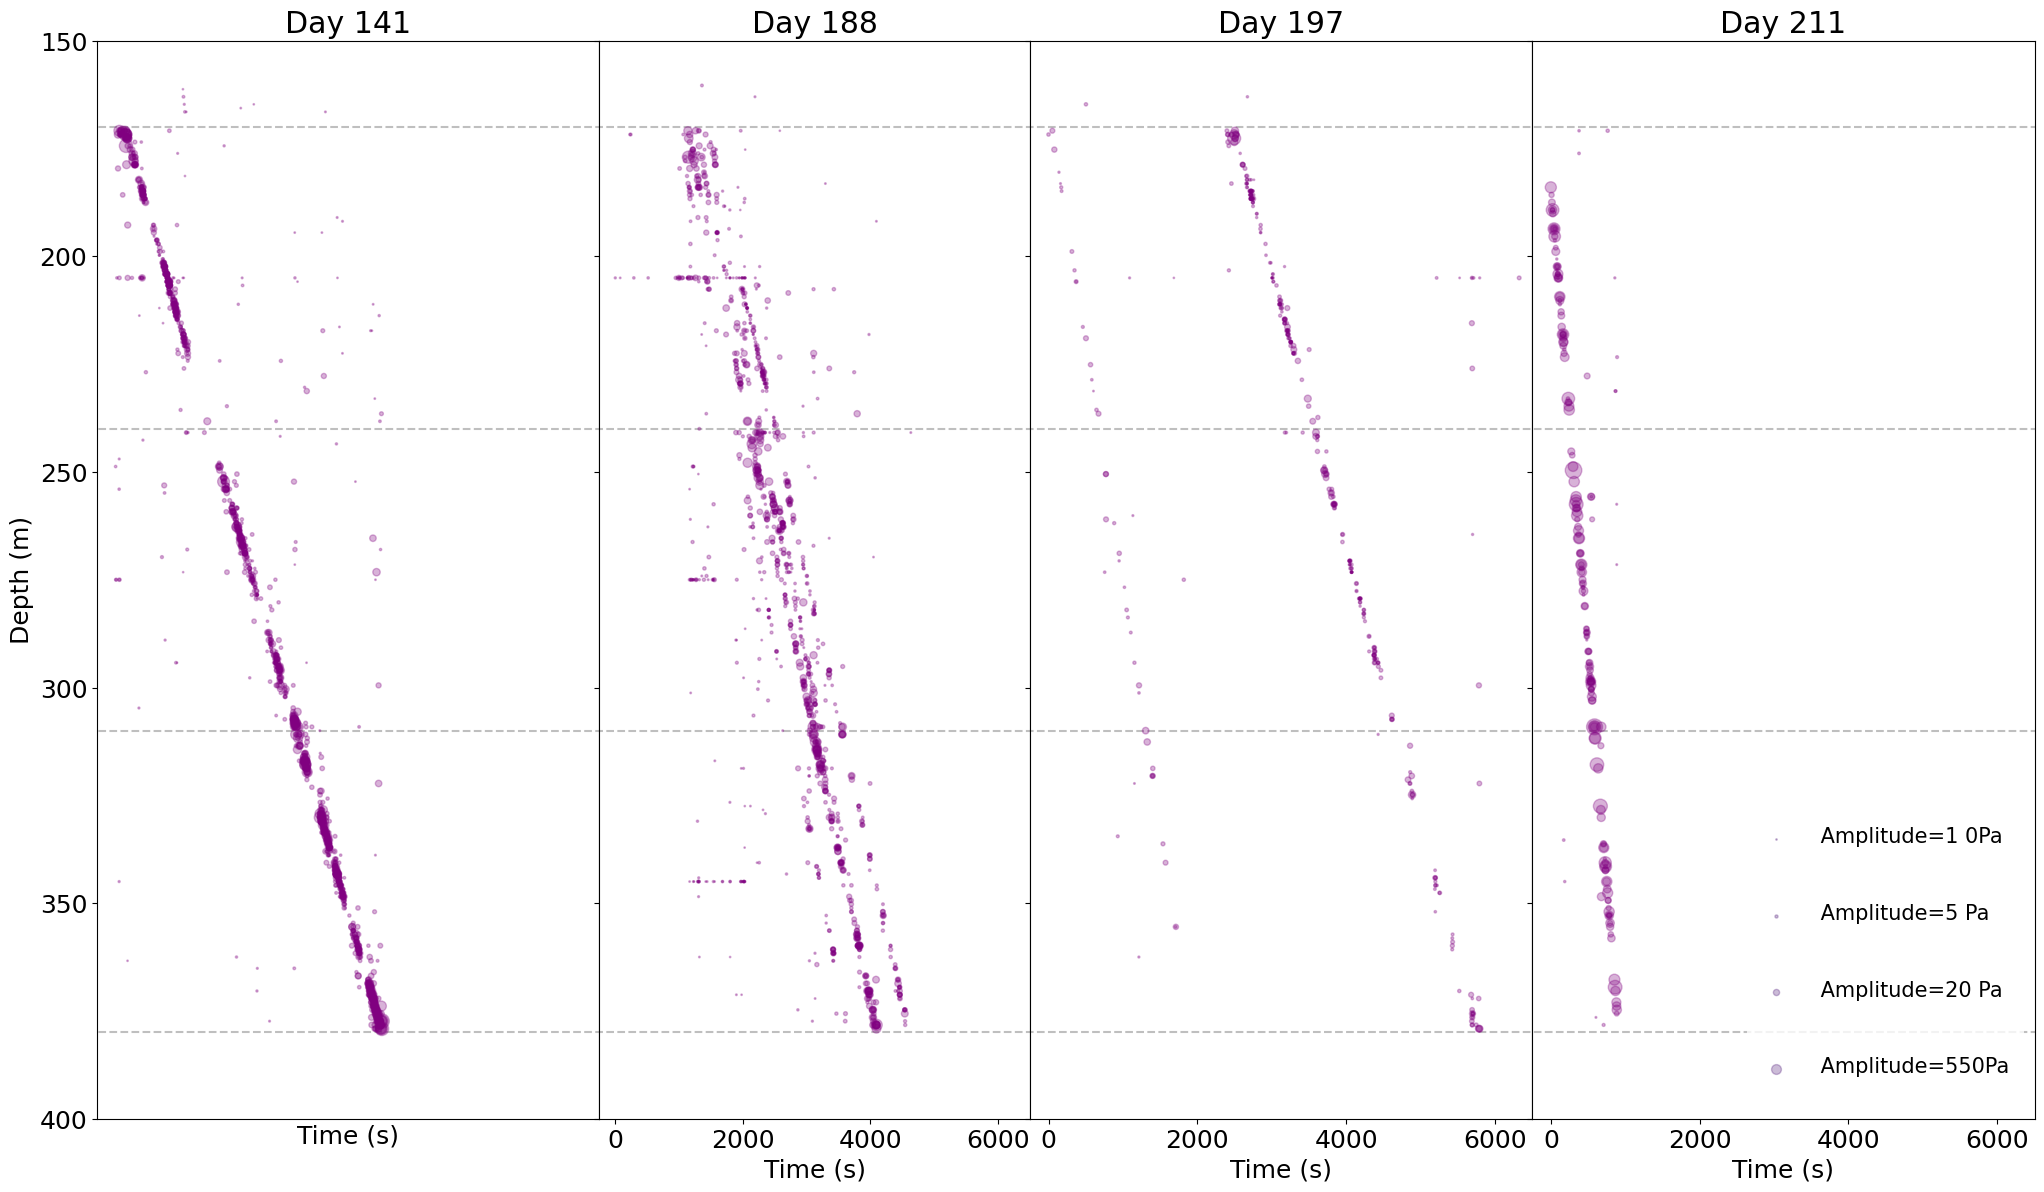

In [42]:
def plot_events(data, ax):
    x = pd.to_datetime(data['origin_time']).diff().apply(lambda t: t.total_seconds()).fillna(0).cumsum().values
    y = data['depth'].values
    s = data['max_amp'].values
    print('amplitude:',s.max())
    print(x.max())
    ax.scatter(x, y, s=s*10, alpha=0.3, c='purple')
    return x.max()

fig = plt.figure(figsize=(25, 14))
mosaic = fig.subplot_mosaic('''
                            bbbbbbbccccccdddddddeeeeeee
                            bbbbbbbccccccdddddddeeeeeee
                            bbbbbbbccccccdddddddeeeeeee
                            bbbbbbbccccccdddddddeeeeeee
                            '''
                           ,sharey=True)
fig.subplots_adjust(wspace=0)

mosaic['b'].set_ylim(400, 150)
mosaic['b'].set_xticks([])
mosaic['b'].set_ylabel('Depth (m)')

for ax in 'bcde':
    mosaic[ax].set_xlim(-250, 6500)
    mosaic[ax].set_xlabel('Time (s)')

mosaic['e'].scatter(() , (), s=[1,], alpha=0.3, color=plt.cm.twilight(0.4), label='\n Amplitude=1 0Pa \n')
mosaic['e'].scatter(() , (), s=[5,], alpha=0.3, color=plt.cm.twilight(0.4), label='\n Amplitude=5 Pa \n')
mosaic['e'].scatter(() , (), s=[20,], alpha=0.3, color=plt.cm.twilight(0.4), label='\n Amplitude=20 Pa \n')
mosaic['e'].scatter(() , (), s=[50,], alpha=0.3, color=plt.cm.twilight(0.4), label='\n Amplitude=550Pa \n')
mosaic['e'].legend(edgecolor='None', loc='lower right', fontsize=15)

plot_hydrophone_depth_horizontal_line(hid='h3', ax=mosaic['b'])
plot_hydrophone_depth_horizontal_line(hid='h4', ax=mosaic['c'])
plot_hydrophone_depth_horizontal_line(hid='h5', ax=mosaic['d'])
plot_hydrophone_depth_horizontal_line(hid='h6', ax=mosaic['e'])

mosaic['b'].set_title('Day 141')
mosaic['c'].set_title('Day 188')
mosaic['d'].set_title('Day 197')
mosaic['e'].set_title('Day 211')

##############
# PLOT DATA HERE
#############

# mosaic['a'].pcolormesh(xx, yy, Z[:-1], vmin=0, vmax=6, cmap='PRGn', shading='auto')

x141 = plot_events(data=df141, ax=mosaic['b'])
x188 = plot_events(data=df188, ax=mosaic['c'])
x197 = plot_events(data=df197, ax=mosaic['d'])
x211 = plot_events(data=df211[20:-10], ax=mosaic['e'])


<Axes: >

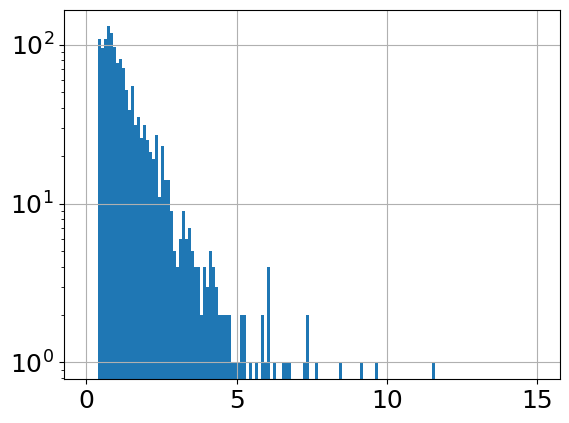

In [19]:
df141.max_amp.hist(bins=np.linspace(0, 15, 151), log=True)

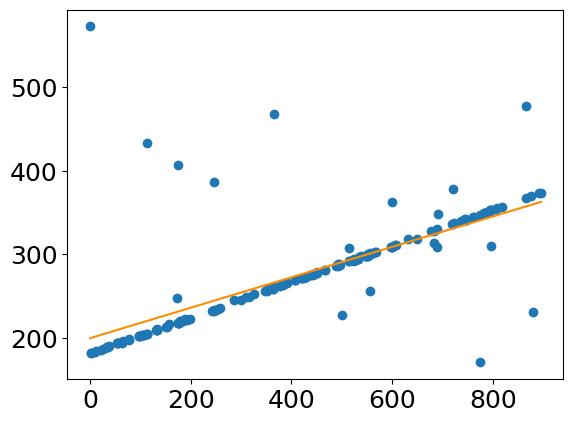

In [20]:
fig, ax = plt.subplots()

data = df211[20:-10].copy()

ax.scatter(data['arrival_datetime'].diff().apply(lambda t: t.total_seconds()).fillna(0).cumsum().values.reshape(-1, 1)[2:]
        ,data['depth'][2:]
          )

x = data['arrival_datetime'].diff().apply(lambda t: t.total_seconds()).fillna(0).cumsum().values.reshape(-1, 1)
y = data['depth'].values.reshape(-1, 1)
lr = linear_model.LinearRegression()
lr.fit(x, y)
# xmod = np.linspace(xstop, 7000, 1000)
modx = np.linspace(0, x.max(), 1000)
ymod = lr.intercept_ + lr.coef_[0] * (modx)
ax.plot(modx, ymod, color='darkorange')
# ax.text(s=f'dz/dt\n{np.round(lr.coef_[0][0]*100, 2)} cm/s'
#                  ,x=3500, y=200
#                  ,fontsize=18)

In [21]:
df211

,id,depth,relative_depth,first_hydrophone,second_hydrophone,arrival_time,first_arrival,second_arrival,dt,max_amp,cum_amp,arrival_datetime,origin_time
3,3,450.00,140.00,5,4,18107.940843,2019-07-30 22:34:48.828999+00:00,2019-07-30 22:34:48.948999+00:00,-0.120,0.437812,36.985012,2019-07-30 22:34:48.828999+00:00,2019-07-30T22:34:48.748999Z
5,5,170.00,0.00,2,3,18107.941234,2019-07-30 22:35:22.659999+00:00,2019-07-30 22:35:22.699999+00:00,-0.040,0.952204,35.500934,2019-07-30 22:35:22.659999+00:00,2019-07-30T22:35:22.659999Z
9,9,170.00,0.00,2,3,18107.944070,2019-07-30 22:39:27.605999+00:00,2019-07-30 22:39:27.645999+00:00,-0.040,4.022802,59.593849,2019-07-30 22:39:27.605999+00:00,2019-07-30T22:39:27.605999Z
13,13,170.00,0.00,2,3,18107.944456,2019-07-30 22:40:01.006999+00:00,2019-07-30 22:40:01.046999+00:00,-0.040,2.065473,45.837921,2019-07-30 22:40:01.006999+00:00,2019-07-30T22:40:01.006999Z
18,18,170.00,0.00,2,3,18107.945043,2019-07-30 22:40:51.713999+00:00,2019-07-30 22:40:51.753999+00:00,-0.040,2.636105,48.212690,2019-07-30 22:40:51.713999+00:00,2019-07-30T22:40:51.713999Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,303,387.00,77.00,5,4,18107.958307,2019-07-30 22:59:57.714999+00:00,2019-07-30 22:59:57.762999+00:00,-0.048,0.765061,47.892116,2019-07-30 22:59:57.714999+00:00,2019-07-30T22:59:57.670999Z
316,316,383.50,73.50,5,4,18107.958986,2019-07-30 23:00:56.367999+00:00,2019-07-30 23:00:56.411999+00:00,-0.044,1.096863,60.496911,2019-07-30 23:00:56.367999+00:00,2019-07-30T23:00:56.325999Z
318,318,257.50,87.50,5,2,18107.958991,2019-07-30 23:00:56.845999+00:00,2019-07-30 23:00:56.865999+00:00,-0.020,0.588272,57.875979,2019-07-30 23:00:56.845998+00:00,2019-07-30T23:00:56.795999Z
319,319,383.50,73.50,5,4,18107.958998,2019-07-30 23:00:57.433999+00:00,2019-07-30 23:00:57.477999+00:00,-0.044,1.836913,75.374782,2019-07-30 23:00:57.433999+00:00,2019-07-30T23:00:57.391999Z


r2:0.3358915048527641
velocity:0.061968788014968766
r2:0.21768811416583844
velocity:0.0976046413535836
r2:1.1061263508693742e-05
velocity:-0.00031044444881050037
r2:0.4298094780265528
velocity:0.11872035508296704
r2:0.497320387455472
velocity:0.167811596698682


(90.0, 410.0)

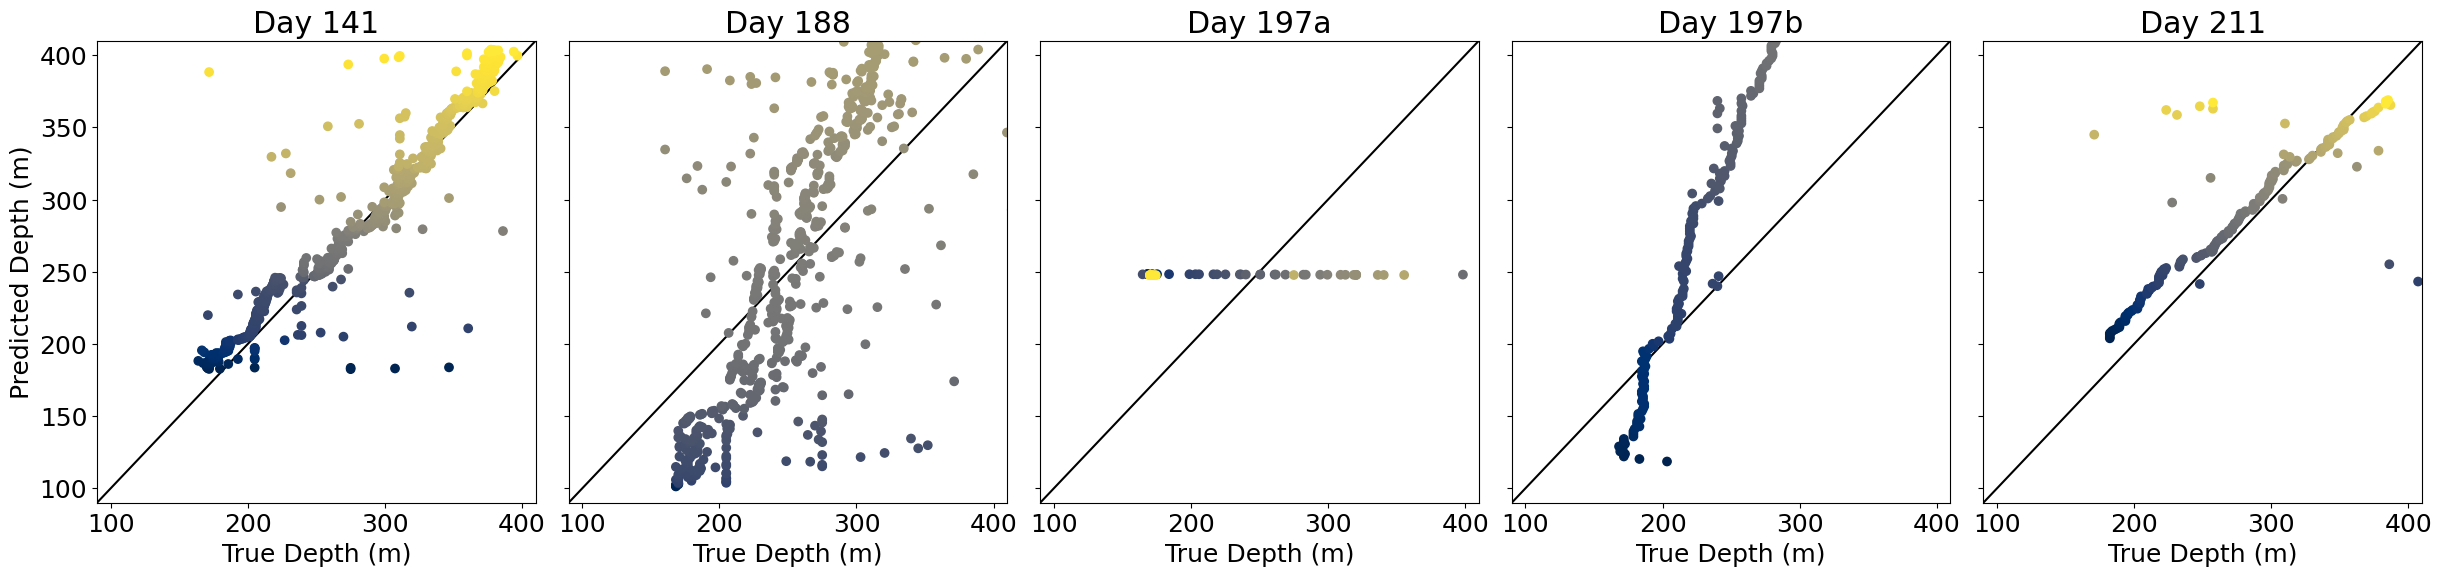

In [22]:
AMPS = []
VELS = []

fig = plt.figure(figsize=(30, 6))
mosaic = fig.subplot_mosaic('''
                            abcde
                            '''
                           ,sharey=True
                           ,sharex=True)
fig.subplots_adjust(wspace=0.075)

def plot_residuals(data, ax, **kwargs):
    data = data.copy()
    x = data['arrival_datetime'].diff()
    x = x.apply(lambda t: t.total_seconds())
    x = x.fillna(0).cumsum().values.reshape(-1, 1)
    y = data['depth'].values
    lr = linear_model.LinearRegression()
    lr.fit(x, y)
    print(f'r2:{lr.score(x, y)}')
    
    xmod = np.linspace(0, x.flatten().max(), x.flatten().shape[0])
    ymod = lr.intercept_ + lr.coef_[0] * xmod
    print(f'velocity:{lr.coef_[0]}')
    VELS.append(lr.coef_[0])

    cbar = ax.scatter(y, ymod, c=x, cmap='cividis')
    ax.plot((0, 500), (0, 500), color='black', zorder=0)
    return xmod, ymod

xymod141 = plot_residuals(data=df141, ax=mosaic['a'])
xymod188 = plot_residuals(data=df188, ax=mosaic['b'])
xymod197a = plot_residuals(data=df197[:44], ax=mosaic['c'])
xymod197b = plot_residuals(data=df197[44:], ax=mosaic['d'])
xymod211 = plot_residuals(data=df211[20:], ax=mosaic['e'])

mosaic['a'].set_ylabel('Predicted Depth (m)')
mosaic['a'].set_xlabel('True Depth (m)')
mosaic['b'].set_xlabel('True Depth (m)')
mosaic['c'].set_xlabel('True Depth (m)')
mosaic['d'].set_xlabel('True Depth (m)')
mosaic['e'].set_xlabel('True Depth (m)')
mosaic['a'].set_title('Day 141')
mosaic['b'].set_title('Day 188')
mosaic['c'].set_title('Day 197a')
mosaic['d'].set_title('Day 197b')
mosaic['e'].set_title('Day 211')
mosaic['a'].set_ylim(90, 410)
mosaic['a'].set_xlim(90, 410)
# plt.tight_layout()
# fig.savefig('fig5.pdf', bbox_inches='tight')

In [23]:
import obspy
df141.origin_time.apply(obspy.UTCDateTime).apply(lambda t: t.datetime)

8      2019-05-21 07:38:17.744000
14     2019-05-21 07:38:42.922000
16     2019-05-21 07:38:43.766500
20     2019-05-21 07:38:53.776500
26     2019-05-21 07:38:57.606500
                  ...            
2234   2019-05-21 08:37:45.145500
2236   2019-05-21 08:37:46.245500
2237   2019-05-21 08:37:46.851500
2239   2019-05-21 08:37:48.472500
2240   2019-05-21 08:37:49.325500
Name: origin_time, Length: 1426, dtype: datetime64[ns]

In [24]:
df141.origin_time.apply(obspy.UTCDateTime).apply(lambda t: t.datetime).diff().apply(lambda t: t.total_seconds())

8           NaN
14      25.1780
16       0.8445
20      10.0100
26       3.8300
         ...   
2234     2.2100
2236     1.1000
2237     0.6060
2239     1.6210
2240     0.8530
Name: origin_time, Length: 1426, dtype: float64

In [25]:
'''
For each catalog with N events, each (i-th) event is characterized by a source depth, zi, and origin time, ti (and amplitude but we won't use that here).
Code up the following where vi = instantaneous velocity at event time ti.

NOTE: remember that Rob uses matlab which is indexed from 1

zmax=z1
tmax=t1
for i = 2:N
  if zi > zmax
    vi = (zi- zmax)/(ti - tmax)
    zmax=zi
    tmax=ti
  end
end
'''

"\nFor each catalog with N events, each (i-th) event is characterized by a source depth, zi, and origin time, ti (and amplitude but we won't use that here).\nCode up the following where vi = instantaneous velocity at event time ti.\n\nNOTE: remember that Rob uses matlab which is indexed from 1\n\nzmax=z1\ntmax=t1\nfor i = 2:N\n  if zi > zmax\n    vi = (zi- zmax)/(ti - tmax)\n    zmax=zi\n    tmax=ti\n  end\nend\n"

In [26]:
# data = df188.copy()

# z = data.depth.values
# t = pd.to_datetime(data.origin_time.values)

# zmax = z[0]
# tmax = t[0]

# v_inst = []
# t_inst = []
# d_inst = []

# for i in np.arange(1, z.shape[0], 1):
#     if z[i] > zmax:
#         dz = z[i] - zmax
#         dt = (t[i] - tmax).total_seconds()
#         vi = dz/dt
#         v_inst.append(vi)
#         t_inst.append(dt)
#         d_inst.append(z[i])
        



In [27]:
# fig, ax = plt.subplots(figsize=(15, 5))
# ax.plot(t_inst, v_inst, marker='x')
# # ax.plot(np.cumsum(t_inst), v_inst)
# # ax.set_ylim(0.04, 0.07)
# ax.set_ylabel('instananeous velocity cm/s')

In [28]:
# fig, ax = plt.subplots(figsize=(9, 8))
# ax.scatter(v_inst, d_inst)
# ax.set_xlim(0.0, 0.1)
# ax.set_ylim(400, 150)

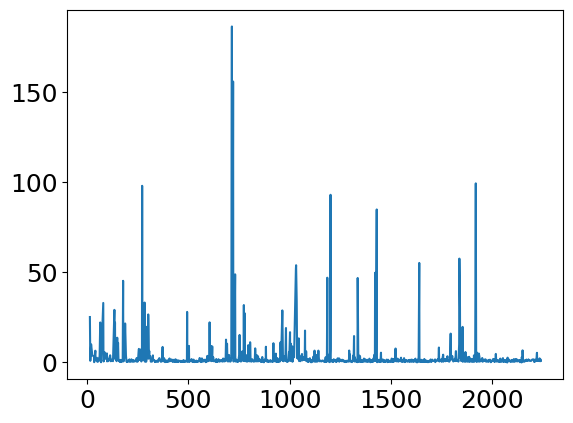

In [29]:
t = df141.origin_time.apply(obspy.UTCDateTime).apply(lambda t: t.datetime).diff().apply(lambda t: t.total_seconds())

plt.plot(t, )

In [30]:
# # data = df188.copy()
# datas = [df141, df188, df197, df211]
# day = ['141', '188', '197', '211']
# colors = ['dodgerblue', 'darkorange', 'purple', 'limegreen']
# fig, ax = plt.subplots(figsize=(9, 8))

# c = 0
# for data in datas:
    
#     z = data.depth.values
#     t = pd.to_datetime(data.origin_time.values)
    
#     zmax = z[0]
#     tmax = t[0]
    
#     v_inst = []
#     t_inst = []
#     d_inst = []
    
#     for i in np.arange(1, z.shape[0], 1):
#         if z[i] > zmax:
#             # dz = z[i] - zmax
#             dz = zmax - z[i]
#             dt = (t[i] - tmax).total_seconds()
#             # vi = (z[i] - zmax)/(t[i] - tmax).total_seconds()
#             vi = dz/dt
#             v_inst.append(vi)
#             # t_inst.append(t[i])
#             t_inst.append(dt)
#             d_inst.append(z[i])
#             zmax = z[i]
#             tmax = t[i]


#     ax.scatter(v_inst, d_inst, color=colors[c], label=day[c], marker='.')
#     c += 1
        
# ax.set_ylim(400, 150)
# ax.set_xlabel('Velocity (cm/s)')
# ax.set_ylabel('Depth (m)')
# ax.set_xlim(-0.01, 2)
# ax.legend()

events dropped for day 141: 844


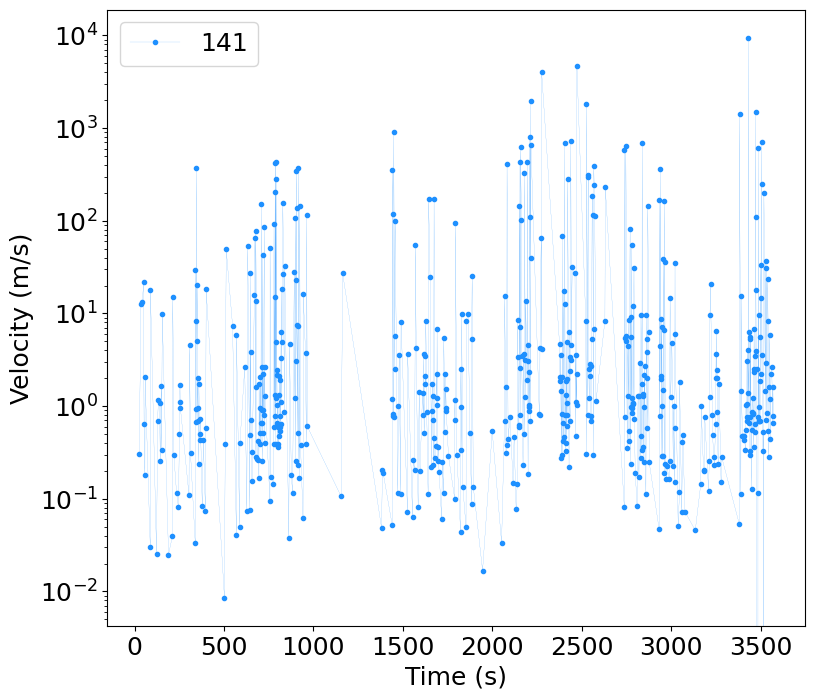

In [31]:
# data = df188.copy()
datas = [df141
         , df188
         , df197
         , df211]
day = ['141'
       , '188'
       , '197'
       , '211']
colors = ['dodgerblue'
          , 'darkorange'
          , 'purple'
          , 'limegreen']
fig, ax = plt.subplots(figsize=(9, 8))

c = 0
dzs = []
for data in datas:
    
    z = data.depth.values
    t = pd.to_datetime(data.origin_time.values)
    
    zmax = z[0]
    tmax = t[0]
    
    v_inst = []
    t_inst = []
    d_inst = []
    dz_inst = []

    n = 0
    for i in np.arange(1, z.shape[0], 1):
        if z[i] > zmax:
            dz = z[i] - zmax
            dt = (t[i] - tmax).total_seconds()
            # vi = (z[i] - zmax)/(t[i] - tmax).total_seconds()
            vi = dz/dt
            v_inst.append(vi)
            # t_inst.append(t[i])
            t_inst.append(dt)
            d_inst.append(z[i])
            dz_inst.append(dz)
            zmax = z[i]
            tmax = t[i]
        else:
            dz_inst.append(z[i] - zmax)
            zmax = z[i]
            n+=1
    print(f'events dropped for day {day[c]}: {n}')
    dzs.append(dz_inst)

    # ax.scatter(v_inst, d_inst, color=colors[c], label=day[c], marker='.')
    ax.plot(np.cumsum(t_inst), v_inst, color=colors[c], label=day[c], marker='.', linewidth=0.1)
    c += 1
    break
        
# ax.set_ylim(-0.02, 2.0)
ax.set_ylabel('Velocity (m/s)')
ax.set_xlabel('Time (s)')
# ax.set_ylim(-0.01, 0.2)
ax.set_yscale('log')
ax.legend()


(array([ 2.,  7., 11., 10.,  7., 13.,  3.,  7.,  8.,  7.,  5., 10., 10.,
         6., 12.,  4.,  7.,  5.,  3.,  9.,  4.,  5.,  3.,  7.,  5.,  7.,
         5.,  2.,  2.,  6.,  1.,  4.,  7.,  4.,  8.,  4.,  1.,  7.,  6.,
         6.,  4.,  5.,  2.,  3.,  3.,  2.,  3.,  2.,  5.,  3.,  4.,  3.,
         1.,  3.,  2.,  2.,  0.,  2.,  1.,  1.,  3.,  6.,  0.,  3.,  5.,
         1.,  1.,  0.,  0.,  2.,  1.,  3.,  0.,  1.,  0.,  1.,  0.,  0.,
         2.,  2.,  0.,  1.,  0.,  1.,  0.,  5.,  1.,  0.,  0.,  0.,  1.,
         0.,  2.,  1.,  1.,  1.,  0.,  2.,  1.]),
 array([0.        , 0.02020202, 0.04040404, 0.06060606, 0.08080808,
        0.1010101 , 0.12121212, 0.14141414, 0.16161616, 0.18181818,
        0.2020202 , 0.22222222, 0.24242424, 0.26262626, 0.28282828,
        0.3030303 , 0.32323232, 0.34343434, 0.36363636, 0.38383838,
        0.4040404 , 0.42424242, 0.44444444, 0.46464646, 0.48484848,
        0.50505051, 0.52525253, 0.54545455, 0.56565657, 0.58585859,
        0.60606061, 0.62626263,

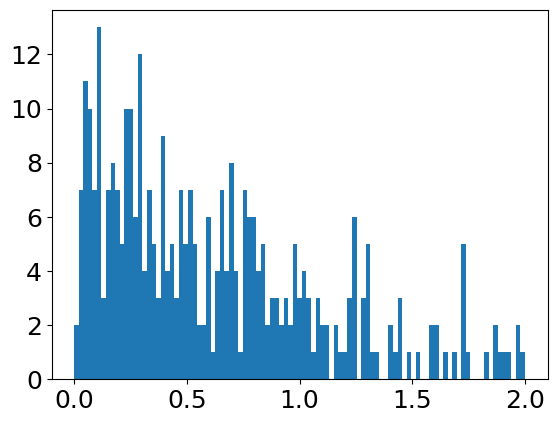

In [32]:
plt.hist(v_inst, bins=np.linspace(0, 2, 100))

In [33]:
df141.shape

(1426, 13)

In [34]:
len(dzs[0])

1425

IndexError: list index out of range

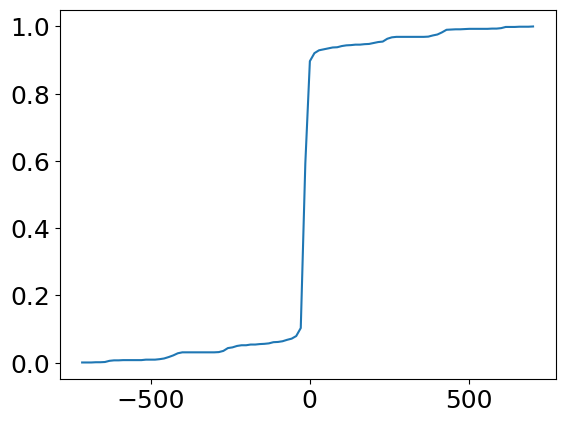

In [35]:
h, e = np.histogram(dzs[0], bins=100)
plt.plot(e[:-1], np.cumsum(h)/np.cumsum(h).max(), label='141')

h, e = np.histogram(dzs[1], bins=100)
plt.plot(e[:-1], np.cumsum(h)/np.cumsum(h).max(), label='188')

h, e = np.histogram(dzs[2], bins=100)
plt.plot(e[:-1], np.cumsum(h)/np.cumsum(h).max(), label='197')

h, e = np.histogram(dzs[3], bins=100)
plt.plot(e[:-1], np.cumsum(h)/np.cumsum(h).max(), label='211')

plt.legend()
plt.xlabel('z[i] - zmax')

In [ ]:
h, e = np.histogram(dzs[0], bins=10000)
plt.plot(e[:-1], np.cumsum(h)/np.cumsum(h).max(), label='141')

h, e = np.histogram(dzs[1], bins=10000)
plt.plot(e[:-1], np.cumsum(h)/np.cumsum(h).max(), label='188')

h, e = np.histogram(dzs[2], bins=10000)
plt.plot(e[:-1], np.cumsum(h)/np.cumsum(h).max(), label='197')

h, e = np.histogram(dzs[3], bins=10000)
plt.plot(e[:-1], np.cumsum(h)/np.cumsum(h).max(), label='211')

plt.legend()
plt.xlabel('z[i] - zmax')
plt.xlim(-1, 1)

In [ ]:
# data = df188.copy()
datas = [df141
         , df188
         , df197
         , df211]
day = ['141'
       , '188'
       , '197'
       , '211']
colors = ['dodgerblue'
          , 'darkorange'
          , 'purple'
          , 'limegreen']

fig, ax = plt.subplots(figsize=(9, 8))

c = 0
dzs = []
for data in datas:
    
    z = data.depth.values
    t = pd.to_datetime(data.origin_time.values)
    
    zmax = z[0]
    tmax = t[0]
    
    v_inst = []
    t_inst = []
    d_inst = []
    dz_inst = []

    n = 0
    for i in np.arange(1, z.shape[0], 1):
        if z[i] > zmax:
            dz = z[i] - zmax
            dt = (t[i] - tmax).total_seconds()
            vi = np.abs(dz/dt)
    
            v_inst.append(vi)
            t_inst.append(dt)
    
            zmax = z[i]
            tmax = t[i]
        else:
            n+=1
    print(f'events dropped for day {day[c]}: {n} out of {data.shape[0]} events')
    # ax.scatter(v_inst, d_inst, color=colors[c], label=day[c], marker='.')
    ax.plot(np.cumsum(t_inst), v_inst, color=colors[c], label=day[c], marker='.', linewidth=0.1)
    c += 1
        
# ax.set_ylim(-0.02, 2.0)
ax.set_ylabel('Velocity (m/s)')
ax.set_xlabel('Time (s)')
# ax.set_ylim(-0.01, 0.2)
ax.set_yscale('log')
ax.legend()

In [ ]:
# data = df188.copy()
datas = [df141
         , df188
         , df197
         , df211]
day = ['141'
       , '188'
       , '197'
       , '211']
colors = ['dodgerblue'
          , 'darkorange'
          , 'purple'
          , 'limegreen']

fig, ax = plt.subplots(figsize=(9, 8))

c = 0
dzs = []
for data in datas:
    
    z = data.depth.values
    t = pd.to_datetime(data.origin_time.values)
    
    zmax = z[0]
    tmax = t[0]
    
    # v_inst = []
    t_inst = []
    # d_inst = []
    dz_inst = []

    n = 0
    for i in np.arange(1, z.shape[0], 1):
        dz = z[i] - zmax
        zmax = z[i]
        dt = (t[i] - tmax).total_seconds()
        tmax = t[i]
    #     if z[i] > zmax:
    #         dz = z[i] - zmax
    #         dt = (t[i] - tmax).total_seconds()
    #         vi = np.abs(dz/dt)
    
    #         v_inst.append(vi)
        t_inst.append(dt)
        dz_inst.append(dz)
    dzs.append(dz_inst)
    
    #         zmax = z[i]
    #         tmax = t[i]
    #     else:
    #         n+=1
    # print(f'events dropped for day {day[c]}: {n} out of {data.shape[0]} events')
    # ax.scatter(v_inst, d_inst, color=colors[c], label=day[c], marker='.')
    # ax.plot(np.cumsum(t_inst), v_inst, color=colors[c], label=day[c], marker='.', linewidth=0.1)
    ax.scatter(t_inst, dz_inst, color=colors[c], label=day[c], marker='.')
    c += 1
        
ax.set_ylim(-100, 100)
ax.set_ylabel('dz (m)')
ax.set_xlabel('dt (s)')
ax.set_xlim(-0.01, 20)
# ax.set_yscale('log')
ax.legend()

In [ ]:
plt.hist(dzs[2], bins=1000)
# plt.xlim(-5, 5)
''

In [ ]:
# # data = df188.copy()
# datas = [df141, df188, df197, df211]
# day = ['141', '188', '197', '211']
# colors = ['dodgerblue', 'darkorange', 'purple', 'limegreen']
# fig, ax = plt.subplots(figsize=(9, 8))

# c = 0
# for data in datas:
    
#     z = data.depth.values
#     t = pd.to_datetime(data.origin_time.values)
#     a = data.max_amp.values
    
#     zmax = z[0]
#     tmax = t[0]
    
#     v_inst = []
#     t_inst = []
#     d_inst = []
#     a_inst = []
    
#     for i in np.arange(1, z.shape[0], 1):
#         if z[i] > zmax:
#             dz = z[i] - zmax
#             dt = (t[i] - tmax).total_seconds()
#             # vi = (z[i] - zmax)/(t[i] - tmax).total_seconds()
#             vi = dz/dt
#             v_inst.append(vi)
#             # t_inst.append(t[i])
#             t_inst.append(dt)
#             d_inst.append(z[i])
#             a_inst.append(a[i])
#             zmax = z[i]
#             tmax = t[i]


#     ax.scatter(v_inst, d_inst, color=colors[c], label=day[c], marker='.')
#     # ax.scatter(t_inst, v_inst, color=colors[c], label=day[c], marker='.')
#     c += 1
#     # break
        
# # ax.set_ylim(-0.01, 0.2)
# # ax.set_ylabel('Velocity (cm/s)')
# # ax.set_xlabel('Amplitude (Pa)')
# # ax.set_xlim(-0.01, 50)
# ax.legend()

In [ ]:
(t[i] - tmax).total_seconds()

In [ ]:

swarm1 = df141[['depth', 'origin_time']].copy()
swarm1['swarm_number'] = 1

swarm2 = df188[['depth', 'origin_time']].copy()
swarm2['swarm_number'] = 2

swarm3 = df197[['depth', 'origin_time']].copy()
swarm3['swarm_number'] = 3

swarm4 = df211[['depth', 'origin_time']].copy()
swarm4['swarm_number'] = 4



pd.concat([swarm1
           ,swarm2
           ,swarm3
           ,swarm4
          ]).to_csv('depths_origintimes_all_swarms.csv', index=False)